In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat
from scipy.spatial.distance import cdist, pdist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [8]:
data = loadmat('mnist_10digits.mat')

In [9]:
X_train = data['xtrain']
y_train = data['ytrain'][0]
np.random.seed(seed=3836)
sample_idx = np.random.choice(np.arange(X_train.shape[0]), size=5000, replace=False)
X_train_sample = X_train[sample_idx, :]
y_train_sample = y_train[sample_idx]
X_test = data['xtest']
y_test = data['ytest'][0]

In [10]:
X_train_norm = X_train / 255
X_train_sample_norm = X_train_sample / 255
X_test_norm = X_test / 255

In [26]:
def mroc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [27]:
res = []
neighbors = list(range(1,20))
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    model.fit(X_train_sample_norm, y_train_sample)
    y_pred = model.predict(X_train_sample_norm)
    auc = mroc_auc_score(y_train_sample, y_pred)
    res.append(auc)

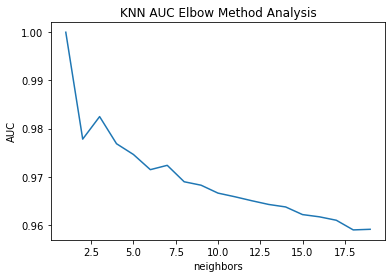

In [28]:
plt.plot(neighbors, res, label ='KNN Train AUC')
plt.ylabel('AUC')
plt.xlabel('neighbors')
plt.title('KNN AUC Elbow Method Analysis')
plt.savefig('knn_auc.png')
plt.show()

In [11]:
labels = np.arange(10)

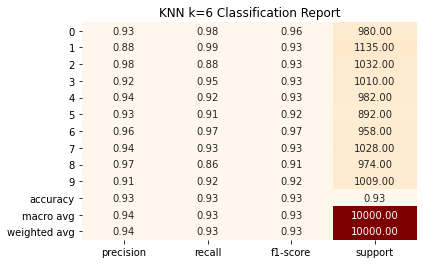

In [30]:
model = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
model.fit(X_train_sample_norm, y_train_sample)
y_pred = model.predict(X_test_norm)
cls = classification_report(y_test, y_pred, labels=labels, output_dict=True)
df = pd.DataFrame(cls).iloc[:, :].T
sns.heatmap(df, annot=True, fmt=".2f", cmap="OrRd", cbar=False)
plt.title('KNN k=6 Classification Report')
plt.savefig('knn_class.png')

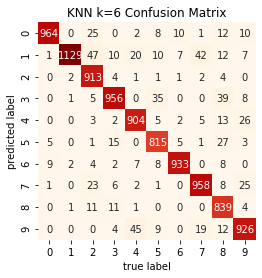

In [31]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="OrRd")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('KNN k=6 Confusion Matrix')
plt.savefig('knn.png')

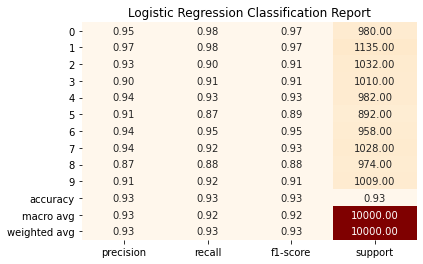

In [32]:
model = LogisticRegression(C=1e3)
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
cls = classification_report(y_test, y_pred, labels=labels, output_dict=True)
df = pd.DataFrame(cls).iloc[:, :].T
sns.heatmap(df, annot=True, fmt=".2f", cmap="OrRd", cbar=False)
plt.title('Logistic Regression Classification Report')
plt.savefig('logistic_class.png')

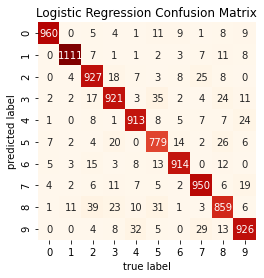

In [33]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="OrRd")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('logistic.png')

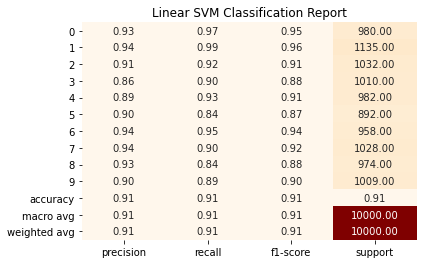

In [23]:
model = SVC(kernel='linear')
model.fit(X_train_sample_norm, y_train_sample)
y_pred = model.predict(X_test_norm)
cls = classification_report(y_test, y_pred, labels=labels, output_dict=True)
df = pd.DataFrame(cls).iloc[:, :].T
sns.heatmap(df, annot=True, fmt=".2f", cmap="OrRd", cbar=False)
plt.title('Linear SVM Classification Report')
plt.savefig('linearsvm_class.png')

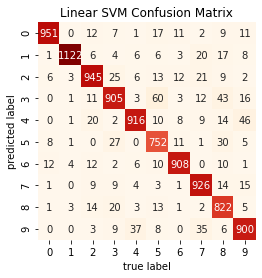

In [24]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="OrRd")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Linear SVM Confusion Matrix')
plt.savefig('linearsvm.png')

In [20]:
svm_median_idx = np.random.choice(np.arange(X_train_sample_norm.shape[0]), size=1000, replace=False)
X_train_sample_norm_median = X_train_sample_norm[svm_median_idx, :]
distances = pdist(X_train_sample_norm_median, 'sqeuclidean')
m = np.median(distances)
sigma = np.sqrt(m/2)
gamma = 1/(2 * sigma ** 2)

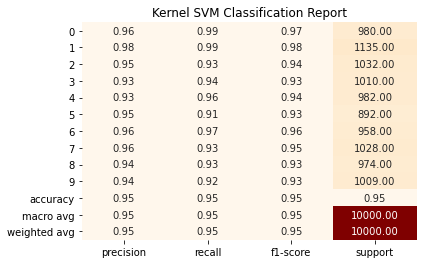

In [21]:
model = SVC(kernel='rbf', gamma=test)
model.fit(X_train_sample_norm, y_train_sample)
y_pred = model.predict(X_test_norm)
cls = classification_report(y_test, y_pred, labels=labels, output_dict=True)
df = pd.DataFrame(cls).iloc[:, :].T
sns.heatmap(df, annot=True, fmt=".2f", cmap="OrRd", cbar=False)
plt.title('Kernel SVM Classification Report')
plt.savefig('kernelsvm_class.png')

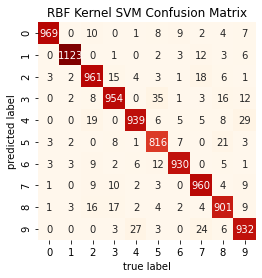

In [22]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="OrRd")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('RBF Kernel SVM Confusion Matrix')
plt.savefig('kernelsvm.png')

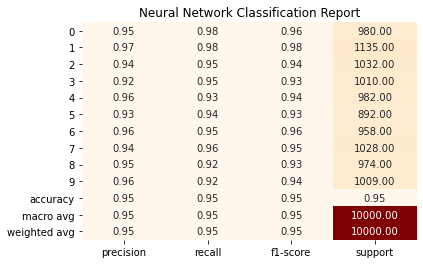

In [38]:
model = MLPClassifier(hidden_layer_sizes=(20, 10))
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
cls = classification_report(y_test, y_pred, labels=labels, output_dict=True)
df = pd.DataFrame(cls).iloc[:, :].T
sns.heatmap(df, annot=True, fmt=".2f", cmap="OrRd", cbar=False)
plt.title('Neural Network Classification Report')
plt.savefig('neural_class.png')

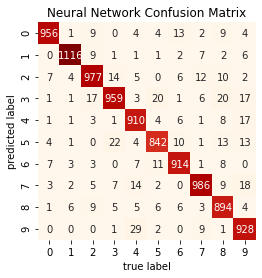

In [39]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="OrRd")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Neural Network Confusion Matrix')
plt.savefig('neural.png')